### A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
#dataset:Company_Data.csv
#Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis. 

In [1]:
#Load important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
#Load dataset
com=pd.read_csv('C:\\Users\\Raja\\Downloads\\assignments\\decisiontree\\Company_Data.csv')

In [3]:
#Show top 5 records
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#Creating new cols Sales_catvar and dividing 'Sales' cols on the basis of [0,10,15] for avg and gud
com["Sales_catvar"] = pd.cut(com["Sales"], bins = [0,10,15], labels = ["avr", "gud"])

In [5]:
#Creating dummies of 'Sales_catvar','ShelveLoc','Urban','US'
com=pd.get_dummies(com, columns=['Sales_catvar','ShelveLoc','Urban','US'], drop_first=True)

In [6]:
#Show top 5 records
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_catvar_gud,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,0,1,1
2,10.06,113,35,10,269,80,59,12,1,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1,0


In [7]:
#Shape of dataframe
com.shape

(400, 13)

In [8]:
#Columns of dataframe
com.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'Sales_catvar_gud', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [9]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
# Normalized data frame (considering the numerical part of data)
df_com = norm_func(com.iloc[:,:])
df_com.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales_catvar_gud,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.460745,0.489541,0.481389,0.228793,0.510701,0.549671,0.514955,0.487500,0.190000,0.212500,0.547500,0.705000,0.645000
std,0.173578,0.156475,0.282687,0.229323,0.295344,0.141776,0.294551,0.327566,0.392792,0.409589,0.498362,0.456614,0.479113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.331285,0.387755,0.219697,0.000000,0.258517,0.455090,0.268182,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.460356,0.489796,0.484848,0.172414,0.525050,0.556886,0.536364,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.572833,0.591837,0.707071,0.413793,0.778557,0.640719,0.745455,0.750000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


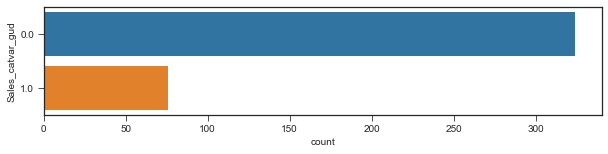

In [11]:
#Seaborn visualization of countplot
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,2)) 
sns.countplot(y="Sales_catvar_gud", data=df_com)

Graph shows that Average category of Sales nearly 340 & Good category is nearly 75 on the basis of bins bins = [0,10,15], labels = ["avr", "gud"]

(array([43., 32., 35., 38., 38., 41., 51., 35., 39., 48.]),
 array([25. , 30.5, 36. , 41.5, 47. , 52.5, 58. , 63.5, 69. , 74.5, 80. ]),
 <a list of 10 Patch objects>)

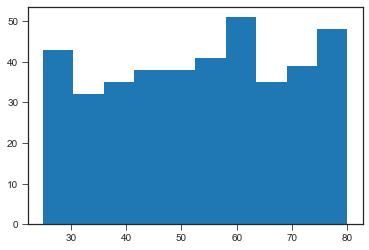

In [12]:
#Seaborn visualization of countplot
plt.hist(x="Age", data=com)

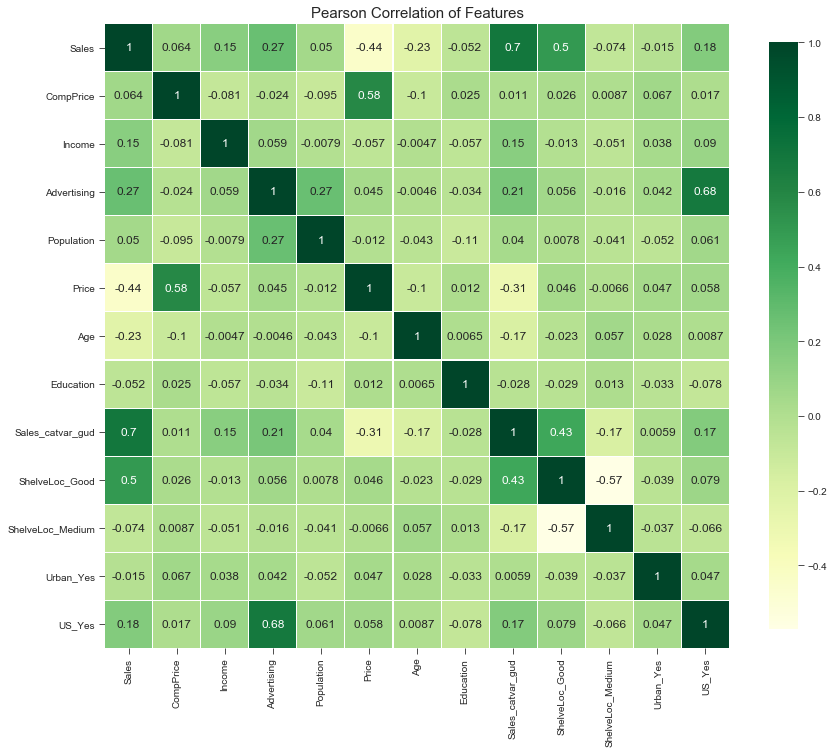

In [13]:
#correlation heatmap of dataset
def correlation_heatmap(com):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        com.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(com)

From the heatmap graph, we can extract many co-related information, deeper the green colore higher the co-relation between respected cols. As ex: Sales_catvar_gud<-->Sales, Advertising<-->US_Yes and so on.

In [14]:
#Selecting features & target of dataframe
X = df_com.drop(['Sales','Sales_catvar_gud'], axis=1) # droping target and un-necessary cols Sales
y = df_com['Sales_catvar_gud']

In [15]:
#Spliting dataset into Xtrain, Xtest, ytrain, ytest
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
#Creating a classifier and fitting into model
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
# Train accuracy, test accuracy
print('Train accuracy: {}'.format(tree.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(tree.score(Xtest, ytest)))

Train accuracy: 1.0
Test accuracy: 0.7875


As we seeing that Train accuracy is exatly 1. It means acting as like overfitting. It is bad for Model. So, we go tuning parameters

###  Tuning hyper-parameter over Overfitting and Underfitting¶

In [33]:
#Creating a new classifier and fitting into model with tuning parameter max_depth
tree_new = DecisionTreeClassifier(max_depth=3)
tree_new.fit(Xtrain, ytrain)
print('Train accuracy: {}'.format(tree_new.score(Xtrain, ytrain)))
print('Test accuracy: {}'.format(tree_new.score(Xtest, ytest)))

Train accuracy: 0.88125
Test accuracy: 0.8875


We can see training & Testing are nearly equal. So, we can conclude that Model is good on this parameter. Model is free Overfitting and Underfitting

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [49]:
# Configuring path to show the nural network graph 
import os
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\Graphviz2.38\\'

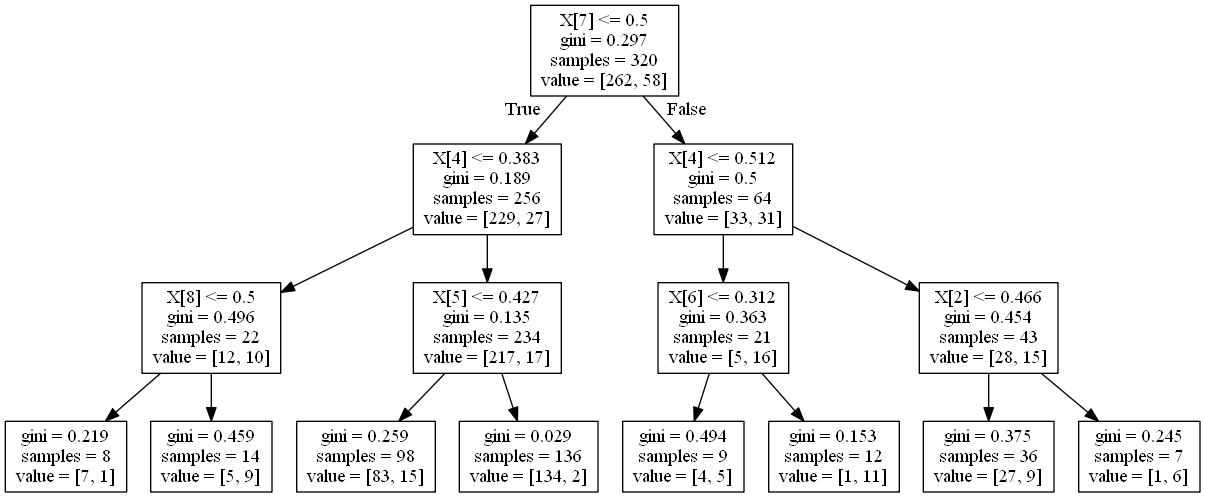

In [51]:
# Create DOT data
dot_data = tree.export_graphviz(tree_new, out_file=None)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())